In [48]:
import pandas as pd
from random import random
import seaborn as sns
import math

In [49]:
df = pd.read_csv("Spotify .csv")
df.head()

,SUM(),song,duration,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Britney Spears,Oops!...I Did It Again,211160,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,blink-182,All The Small Things,167066,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,Faith Hill,Breathe,250546,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,Bon Jovi,It's My Life,224493,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,*NSYNC,Bye Bye Bye,200560,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656


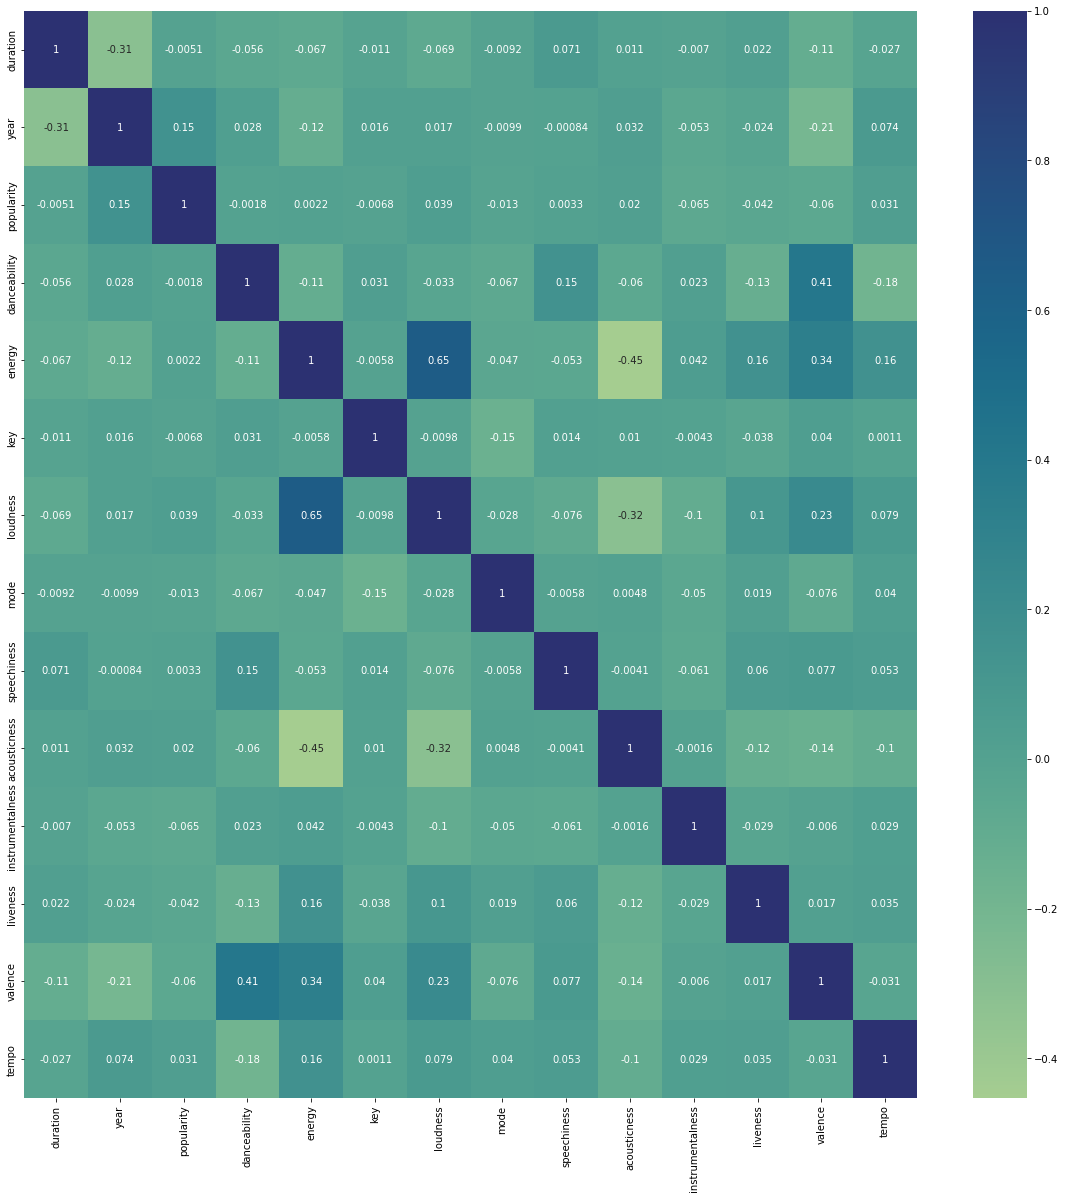

In [62]:
df.drop(df.index[df["popularity"] == 0],inplace=True)
df_min_max_scaled=df.copy()
for column in df_min_max_scaled.columns:
    try:
        df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
    except:
        pass
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
cor = df_min_max_scaled.corr()
fig.set_size_inches(20,20)
sns.heatmap(cor, ax=ax,cmap="crest", annot=True)
length = len(df_min_max_scaled.index)
splitHere = int(length * 0.7)
train = df_min_max_scaled[0:splitHere]
test = df_min_max_scaled[splitHere:length]

In [51]:
def trainMRModel(trainDF, iterations):
  modelA = [0.5, 0.5, 0.5, 0.5]

  distanceA = calculateDistance(trainDF, modelA)
  print("First model - weights: ", modelA, " distance: ", distanceA)
  
  modelB = modelA[:] 
  for i in range(iterations):
    modelB = take_best_step(trainDF, modelB)
  
  distanceB = calculateDistance(trainDF, modelB)
  print("Final model - weights: ", modelB, " distance: ", distanceB)
  
def take_random_step(model):
  return [
      model[0] + (random() - 0.5), 
      model[1] + (random() - 0.5),
      model[2] + (random() - 0.5),
      model[3] + (random() - 0.5)
  ]

def take_best_step(trainDF, model):
  old_distance = calculateDistance(trainDF, model)
  for i in range(50): 
    new_model = take_random_step(model)
    new_distance = calculateDistance(trainDF, new_model)
    if new_distance < old_distance:
      return new_model
  return model 

def calculateDistance(trainDF, model):
  sum = 0
  for i in range(len(trainDF.index[:10])):
    energy = trainDF.iat[i, 6]
    loudness = trainDF.iat[i, 8]
    valenc = trainDF.iat[i, 14]
    a = model[0]
    b = model[1]
    c = model[2]
    d = model[3]
    numerator = abs((a * energy) + (b * loudness) + (c * valenc) + d)
    denominator = math.sqrt((a * a) + (b * b) + (c * c ) + (d * d))
    distance = numerator / denominator
    sum = sum + distance
 
  return sum

In [52]:
trainMRModel(train, 2000)

First model - weights:  [0.5, 0.5, 0.5, 0.5]  distance:  16.29459159505182
Final model - weights:  [0.3877845166695665, 3.2646257748778957, -0.11364837141524708, -2.7869124251072197]  distance:  0.40724351031516554


In [53]:
test.reset_index(drop=True,inplace=True)
mse=0
for i in range(len(test)):
    energy = test.iat[i, 6]
    loudness = test.iat[i, 8]
    valenc = test.iat[i, 14]
    pop=test.iat[i,4]
    mse += ((0.4951436094919306*energy-3.3007917254961323+3.901795645271723*loudness-0.20405775450015728*valenc)-pop)**2

print(mse)
mse = mse/len(test)
print(mse)

680.7430976279452
1.2091351645256576


In [64]:
dfDe = df_min_max_scaled.copy()
for column in dfDe:
    try:
        dfDe[column]= df[column]*(dfDe[column].max() - dfDe[column].min())+dfDe[column].min()
    except:
        pass

mse=0
for i in range(len(dfDe)):
    energy = dfDe.iat[i, 6]
    loudness = dfDe.iat[i, 8]
    valenc = dfDe.iat[i, 14]
    pop = dfDe.iat[i,4]
    mse += ((0.4951436094919306*energy-3.3007917254961323+3.901795645271723*loudness-0.20405775450015728*valenc)-pop)**2

print(mse)
mse = mse/len(test)
print(mse)

15180988.393225601
26964.45540537407


In [63]:
dfDe.reset_index(drop=True,inplace=True)
dfDe.head()
#ax+bx+cx+b=pop
sums=abs((0.4951436094919306*0.54)+(-5.692*3.901795645271723)+(-0.20405775450015728*121.932)-3.3007917254961323)
print(sums)

50.12360511097032
